/Users/xuantingdong/.pyenv/versions/3.9.1/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


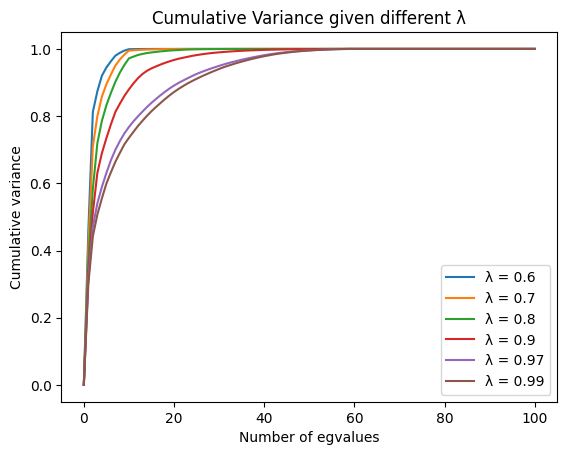

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

retrun_data = pd.read_csv("DailyReturn.csv").drop("Unnamed: 0", axis=1)

def exw_cov(ret_data, w_lambda):
    weight = np.power(w_lambda, np.arange(len(ret_data)-1, -1, -1))
    weight /= weight.sum()
    ret_means = ret_data - ret_data.mean()
    return np.dot(ret_means.T * weight, ret_means)

cov_mtx = exw_cov(retrun_data, 0.97)

def PCA(cov_mtx, n_egvalues):
    egvalues, egvectors = np.linalg.eig(cov_mtx)
    p_idx = egvalues > 1e-8
    egvalues, egvectors = egvalues[p_idx], egvectors[:, p_idx]
    s_idx = np.argsort(egvalues)[::-1]
    egvalues, egvectors = egvalues[s_idx], egvectors[:, s_idx]
    return np.sum(egvalues[:n_egvalues]) / np.sum(egvalues)

lambdas = [0.6, 0.7, 0.8, 0.9, 0.97, 0.99]
for w_lambda in lambdas:
    cov_mtx = exw_cov(retrun_data, w_lambda)
    cul_var = [PCA(cov_mtx, i) for i in range(101)]
    plt.plot(cul_var, label=f"λ = {w_lambda}")
plt.xlabel("Number of egvalues")
plt.ylabel("Cumulative variance")
plt.title("Cumulative Variance given different λ")
plt.legend()
plt.show()
